In [128]:
# Install required packages.
import os
import torch
import numpy as np
from torch.nn import Linear
import statistics
import torch.nn.functional as F

os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# # Helper function for visualization.
# %matplotlib inline
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# def visualize(h, color):
#     z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

#     plt.figure(figsize=(10,10))
#     plt.xticks([])
#     plt.yticks([])

#     plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
#     plt.show()

# Helper function for visualization.
# %matplotlib inline
# import torch
# import networkx as nx
# import matplotlib.pyplot as plt

# # Visualization function for NX graph or PyTorch tensor
# def visualize(h, color, epoch=None, loss=None, accuracy=None):
#     plt.figure(figsize=(7,7))
#     plt.xticks([])
#     plt.yticks([])

#     if torch.is_tensor(h):
#         h = h.detach().cpu().numpy()
#         plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
#         if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
#             plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
#                        f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
#                        f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
#                        fontsize=16)
#     else:
#         nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
#                          node_color=color, cmap="Set2")
#     plt.show()

1.10.2


In [172]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

# Graph Neural Networks

In [129]:
from torch_geometric.datasets import Planetoid, Reddit, Flickr, KarateClub, TUDataset, FacebookPagePage
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.nn import MessagePassing

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
#dataset = Reddit(root='data/Reddit')
#dataset = Flickr(root='data/Flickr')
#dataset = FacebookPagePage(root='data/FacebookPagePage')
# dataset = KarateClub()

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [161]:
train_accuracy_coms = []
val_accuracy_coms = []
train_epochs = 50

GRAPH CONVOLUTIONAL NETWORK

<IPython.core.display.Javascript object>

######### LAYER =  2  #######
Epoch: 050, Loss: 0.4974
Train Accuracy: 0.9786
Val Accuracy: 0.7596
GCN(
  (convs): ModuleList(
    (0): GCNConv(1433, 16)
    (1): GCNConv(16, 16)
  )
  (acts): ModuleList(
    (0): ReLU()
    (1): ReLU()
  )
  (classifier): Linear(in_features=16, out_features=7, bias=True)
)
######### LAYER =  3  #######
Epoch: 050, Loss: 0.8557
Train Accuracy: 0.5714
Val Accuracy: 0.3929
GCN(
  (convs): ModuleList(
    (0): GCNConv(1433, 16)
    (1): GCNConv(16, 16)
    (2): GCNConv(16, 16)
  )
  (acts): ModuleList(
    (0): ReLU()
    (1): ReLU()
    (2): ReLU()
  )
  (classifier): Linear(in_features=16, out_features=7, bias=True)
)
######### LAYER =  4  #######
Epoch: 050, Loss: 0.5516
Train Accuracy: 0.8643
Val Accuracy: 0.6285
GCN(
  (convs): ModuleList(
    (0): GCNConv(1433, 16)
    (1): GCNConv(16, 16)
    (2): GCNConv(16, 16)
    (3): GCNConv(16, 16)
  )
  (acts): ModuleList(
    (0): ReLU()
    (1): ReLU()
    (2): ReLU()
    (3): ReLU()
  )
  (classifier): Li

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


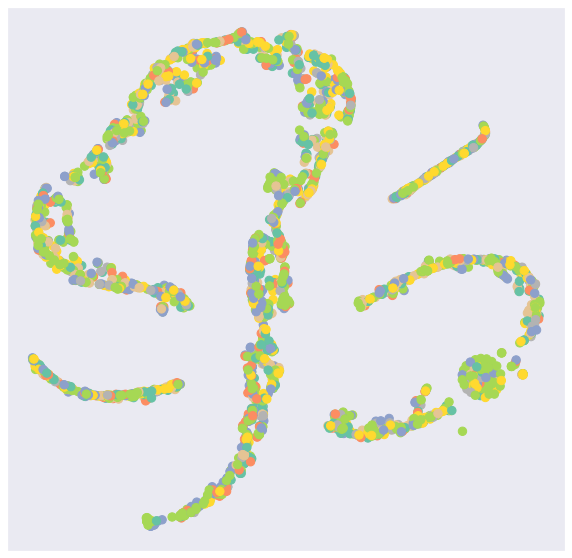

In [174]:
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, num_layers, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.convs = torch.nn.ModuleList()
        self.acts = nn.ModuleList()
        a = nn.ReLU()
        self.convs.append(GCNConv(dataset.num_features, hidden_channels))
        self.acts.append(a)
        for i in range(num_layers-1):
            self.convs.append(GCNConv(hidden_channels, hidden_channels))
            self.acts.append(a)
        self.classifier = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, num_layers):
        h=x
        for l in range(num_layers):
            h = self.convs[l](h, edge_index)
            h = self.acts[l](h)
        out = self.classifier(h)
        return out, h

from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

def init_model(num_layers):
      model = GCN(num_layers, hidden_channels=16)
      optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
      criterion = torch.nn.CrossEntropyLoss()
      return model, optimizer, criterion

def train(model, optimizer, criterion, num_layers):
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out, h = model(data.x, data.edge_index, num_layers)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      accuracy = 0
      accuracy_val = 0
      return out, h, loss, accuracy, accuracy_val

def train_test(model, optimizer, criterion, num_layers):
      model.eval()
      out, h = model(data.x, data.edge_index, num_layers)
      predicted_classes = torch.argmax(out[data.train_mask], axis=1)
      target_classes = data.y[data.train_mask]
      #train_correct = pred[data.train_mask] == data.y[data.train_mask]  # Check against ground-truth labels.
      #print(out)
      train_acc = torch.mean(torch.where(predicted_classes == target_classes, 1, 0).float())
      predicted_classes = torch.argmax(out, axis=1)
      target_classes = data.y
      accuracy_val = torch.mean(torch.where(predicted_classes == target_classes, 1, 0).float())
      return train_acc, accuracy_val

def test(model, optimizer, criterion, num_layers):
      model.eval()
      out = model(data.x, data.edge_index, num_layers)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

def call_train(model, optimizer, criterion, num_layers):
    for epoch in range(1, train_epochs+1):
        out, h, loss, accuracy, accuracy_val = train(model, optimizer, criterion, num_layers)
        if epoch==0 or epoch%train_epochs==0:
            print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    accuracy, accuracy_val = train_test(model, optimizer, criterion, num_layers)
    return out, h, accuracy, accuracy_val

def modeler(num_layers):
      model, optimizer, criterion = init_model(num_layers)
      out_x, h, accuracy, accuracy_val = call_train(model, optimizer, criterion, num_layers)
      #test_acc = test(model, optimizer, criterion, num_layers)*100
      #test_accuracy_list.append(test_acc)
      #train_acc = train_test(model, optimizer, criterion, num_layers)*100
      train_accuracy_list.append(accuracy.item())
      val_accuracy_list.append(accuracy_val.item())
      #print(f'Test Accuracy: {test_acc:.4f}')
      print(f'Train Accuracy: {accuracy:.4f}')
      print(f'Val Accuracy: {accuracy_val:.4f}')
      return model, out_x, h
    
# WITH MAD
test_accuracy_list = []
train_accuracy_list = []
val_accuracy_list = []
avg_sim_list = []
xpoints = []
MAD_SCORES = []
def layer_modeler(m):
    print("######### LAYER = ", m, " #######")
    xpoints.append(m)
    model, out_x, h = modeler(m)
    print(model)
    return h
    

def arrival(m):
    sim_mat = []
    row_diff_mat = []
    diff_mat = []
    for i in range(2, m+1):
        h = layer_modeler(i)
        if i == m:
            visualize(h, color=data.y)
    return sim_mat, row_diff_mat, diff_mat

similarity_scores, row_differences, difference_scores = arrival(9)

[Text(0.5, 0, 'Layers'), Text(0, 0.5, 'Accuracy')]

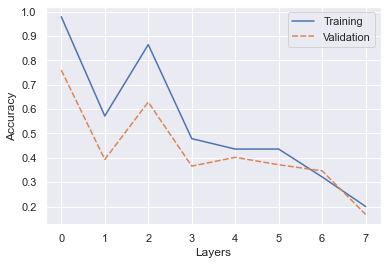

In [175]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({"Training": train_accuracy_list,
                 "Validation" : val_accuracy_list})
train_accuracy_coms.append(df)
p = sns.lineplot(data = df)
p.set( xlabel = "Layers", ylabel = "Accuracy")

GRAPH ATTENTION NETWORK

<IPython.core.display.Javascript object>

######### LAYER =  2  #######
Epoch: 050, Loss: 0.6513
Train Accuracy: 0.9429
Val Accuracy: 0.6961
GAT(
  (convs): ModuleList(
    (0): GATConv(1433, 16, heads=1)
    (1): GATConv(16, 16, heads=1)
  )
  (acts): ModuleList(
    (0): LeakyReLU(negative_slope=0.01)
    (1): LeakyReLU(negative_slope=0.01)
  )
  (classifier): Linear(in_features=16, out_features=7, bias=True)
)
######### LAYER =  3  #######
Epoch: 050, Loss: 0.6729
Train Accuracy: 0.7857
Val Accuracy: 0.5425
GAT(
  (convs): ModuleList(
    (0): GATConv(1433, 16, heads=1)
    (1): GATConv(16, 16, heads=1)
    (2): GATConv(16, 16, heads=1)
  )
  (acts): ModuleList(
    (0): LeakyReLU(negative_slope=0.01)
    (1): LeakyReLU(negative_slope=0.01)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (classifier): Linear(in_features=16, out_features=7, bias=True)
)
######### LAYER =  4  #######
Epoch: 050, Loss: 0.5839
Train Accuracy: 0.9286
Val Accuracy: 0.5842
GAT(
  (convs): ModuleList(
    (0): GATConv(1433, 16, heads=1)
    (1): GATC

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


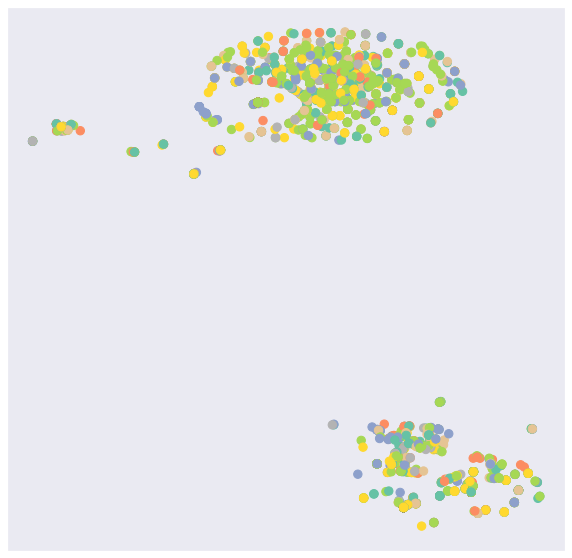

In [176]:
from torch_geometric.nn import GATConv
import torch.nn as nn
class GAT(torch.nn.Module):
    def __init__(self, num_layers, hidden_channels, pool="sum",
                heads=1, bn=False, xavier=True):
        super(GAT, self).__init__()
        self.convs = torch.nn.ModuleList()
        self.acts = nn.ModuleList()
        a = nn.LeakyReLU()
        self.convs.append(GATConv(data.num_features, hidden_channels, heads=heads, concat=False))
        self.acts.append(a)
        for i in range(num_layers-1):
            self.convs.append(GATConv(hidden_channels, hidden_channels, heads=heads, concat=False))
            self.acts.append(a)
        self.classifier = Linear(hidden_channels, dataset.num_classes)


    def forward(self, x, edge_index, num_layers):
        h=x
        for l in range(num_layers):
            h = self.convs[l](h, edge_index)
            h = self.acts[l](h)
        out = self.classifier(h)
        return out, h
    
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

def init_model(num_layers):
      model = GAT(num_layers, hidden_channels=16)
      optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
      criterion = torch.nn.CrossEntropyLoss()
      return model, optimizer, criterion

def train(model, optimizer, criterion, num_layers):
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out, h = model(data.x, data.edge_index, num_layers)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      accuracy = 0
      accuracy_val = 0
      return out, h, loss, accuracy, accuracy_val

def train_test(model, optimizer, criterion, num_layers):
      model.eval()
      out, h = model(data.x, data.edge_index, num_layers)
      predicted_classes = torch.argmax(out[data.train_mask], axis=1)
      target_classes = data.y[data.train_mask]
      #train_correct = pred[data.train_mask] == data.y[data.train_mask]  # Check against ground-truth labels.
      #print(out)
      train_acc = torch.mean(torch.where(predicted_classes == target_classes, 1, 0).float())
      predicted_classes = torch.argmax(out, axis=1)
      target_classes = data.y
      accuracy_val = torch.mean(torch.where(predicted_classes == target_classes, 1, 0).float())
      return train_acc, accuracy_val

def test(model, optimizer, criterion, num_layers):
      model.eval()
      out = model(data.x, data.edge_index, num_layers)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

def call_train(model, optimizer, criterion, num_layers):
    for epoch in range(1, train_epochs+1):
        out, h, loss, accuracy, accuracy_val = train(model, optimizer, criterion, num_layers)
        if epoch==0 or epoch%train_epochs==0:
            print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    accuracy, accuracy_val = train_test(model, optimizer, criterion, num_layers)
    return out, h, accuracy, accuracy_val


def modeler(num_layers):
      model, optimizer, criterion = init_model(num_layers)
      out_x, h, accuracy, accuracy_val = call_train(model, optimizer, criterion, num_layers)
      #test_acc = test(model, optimizer, criterion, num_layers)*100
      #test_accuracy_list.append(test_acc)
      #train_acc = train_test(model, optimizer, criterion, num_layers)*100
      train_accuracy_list.append(accuracy.item())
      val_accuracy_list.append(accuracy_val.item())
      #print(f'Test Accuracy: {test_acc:.4f}')
      print(f'Train Accuracy: {accuracy:.4f}')
      print(f'Val Accuracy: {accuracy_val:.4f}')
      return model, out_x, h
    
    
# WITH MAD
test_accuracy_list = []
train_accuracy_list = []
val_accuracy_list = []
avg_sim_list = []
xpoints = []
MAD_SCORES = []
def layer_modeler(m):
    print("######### LAYER = ", m, " #######")
    xpoints.append(m)
    model, out_x, h = modeler(m)
    print(model)
    return h

def arrival(m):
    sim_mat = []
    row_diff_mat = []
    diff_mat = []
    for i in range(2, m+1):
        h = layer_modeler(i)
        if i == m:
            visualize(h, color=data.y)
    return sim_mat, row_diff_mat, diff_mat
    
similarity_scores, row_differences, difference_scores = arrival(9)

[Text(0.5, 0, 'Layers'), Text(0, 0.5, 'Accuracy')]

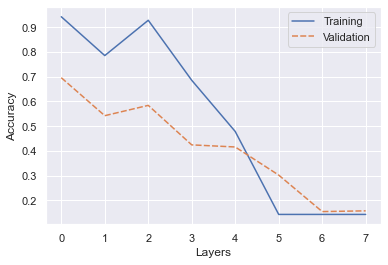

In [177]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({"Training": train_accuracy_list,
                 "Validation" : val_accuracy_list})
train_accuracy_coms.append(df)
p = sns.lineplot(data = df)
p.set( xlabel = "Layers", ylabel = "Accuracy")

GRAPH ISOMORPHIC NETWORK

In [185]:
from functools import partial
import torch.nn.functional as F
from torch_scatter import scatter_add
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.nn.inits import glorot, zeros
from torch.nn import Parameter, Sequential, Linear, BatchNorm1d
from torch_geometric.utils import remove_self_loops, add_self_loops
from torch_geometric.nn import GCNConv, GINConv, GATConv, SAGEConv, SGConv, global_add_pool, global_mean_pool
class GIN(torch.nn.Module):
    def __init__(self, num_layers, hidden_channels, pool="sum",
                heads=1, bn=False, xavier=True):
        super(GIN, self).__init__()
        self.convs = torch.nn.ModuleList()
        self.act = torch.nn.ReLU()
        mlp = Sequential(Linear(data.num_features, hidden_channels),
                         self.act,
                         Linear(hidden_channels, hidden_channels))
        conv = GINConv(mlp)
        self.convs.append(conv)
        for i in range(num_layers-1):
            mlp = Sequential(Linear(hidden_channels, hidden_channels),
                         self.act,
                         Linear(hidden_channels, hidden_channels))
            conv = GINConv(mlp)
            self.convs.append(conv)
        self.classifier = Linear(hidden_channels, dataset.num_classes)


    def forward(self, x, edge_index, num_layers):
        h=x
        for l in range(num_layers):
            h = self.convs[l](h, edge_index)
            h = self.act(h)
        out = self.classifier(h)
        return out, h
    
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

def init_model(num_layers):
      model = GIN(num_layers, hidden_channels=16)
      optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
      criterion = torch.nn.CrossEntropyLoss()
      return model, optimizer, criterion

def train(model, optimizer, criterion, num_layers):
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out, h = model(data.x, data.edge_index, num_layers)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      accuracy = 0
      accuracy_val = 0
      return out, h, loss, accuracy, accuracy_val

def train_test(model, optimizer, criterion, num_layers):
      model.eval()
      out, h = model(data.x, data.edge_index, num_layers)
      predicted_classes = torch.argmax(out[data.train_mask], axis=1)
      target_classes = data.y[data.train_mask]
      #train_correct = pred[data.train_mask] == data.y[data.train_mask]  # Check against ground-truth labels.
      #print(out)
      train_acc = torch.mean(torch.where(predicted_classes == target_classes, 1, 0).float())
      predicted_classes = torch.argmax(out, axis=1)
      target_classes = data.y
      accuracy_val = torch.mean(torch.where(predicted_classes == target_classes, 1, 0).float())
      return train_acc, accuracy_val

def test(model, optimizer, criterion, num_layers):
      model.eval()
      out = model(data.x, data.edge_index, num_layers)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

def call_train(model, optimizer, criterion, num_layers):
    for epoch in range(1, train_epochs+1):
        out, h, loss, accuracy, accuracy_val = train(model, optimizer, criterion, num_layers)
        if epoch==0 or epoch%train_epochs==0:
            print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    accuracy, accuracy_val = train_test(model, optimizer, criterion, num_layers)
    return out, h, accuracy, accuracy_val


def modeler(num_layers):
      model, optimizer, criterion = init_model(num_layers)
      out_x, h, accuracy, accuracy_val = call_train(model, optimizer, criterion, num_layers)
      #test_acc = test(model, optimizer, criterion, num_layers)*100
      #test_accuracy_list.append(test_acc)
      #train_acc = train_test(model, optimizer, criterion, num_layers)*100
      train_accuracy_list.append(accuracy.item())
      val_accuracy_list.append(accuracy_val.item())
      #print(f'Test Accuracy: {test_acc:.4f}')
      print(f'Train Accuracy: {accuracy:.4f}')
      print(f'Val Accuracy: {accuracy_val:.4f}')
      return model, out_x, h
    
    
# WITH MAD
test_accuracy_list = []
train_accuracy_list = []
val_accuracy_list = []
avg_sim_list = []
xpoints = []
MAD_SCORES = []
def layer_modeler(m):
    print("######### LAYER = ", m, " #######")
    xpoints.append(m)
    model, out_x, h = modeler(m)
    print(model)
    return h

def arrival(m):
    sim_mat = []
    row_diff_mat = []
    diff_mat = []
    for i in range(2, m+1):
        h = layer_modeler(i)
        if i == m:
            visualize(h, color=data.y)
    return sim_mat, row_diff_mat, diff_mat
    
similarity_scores, row_differences, difference_scores = arrival(9)

<IPython.core.display.Javascript object>

######### LAYER =  2  #######


KeyboardInterrupt: 

[Text(0.5, 0, 'Layers'), Text(0, 0.5, 'Accuracy')]

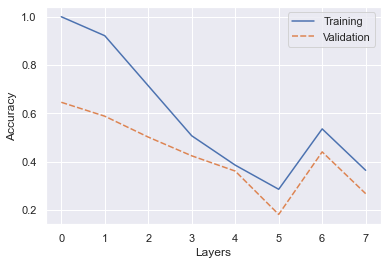

In [179]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({"Training": train_accuracy_list,
                 "Validation" : val_accuracy_list})
train_accuracy_coms.append(df)
p = sns.lineplot(data = df)
p.set( xlabel = "Layers", ylabel = "Accuracy")

<class 'pandas.core.frame.DataFrame'>


[Text(0.5, 0, 'Layers'), Text(0, 0.5, 'Accuracy')]

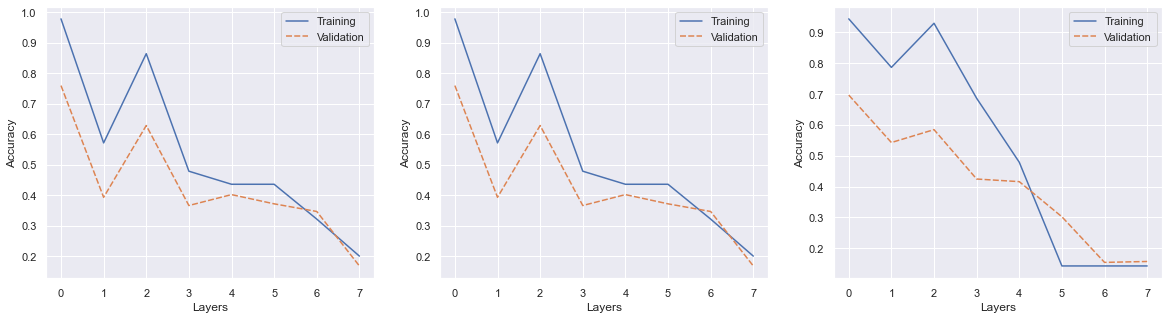

In [180]:
import seaborn as sns
import pandas as pd
print(type(train_accuracy_coms[0]))
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
#create boxplot in each subplot
p1 = sns.lineplot(data = train_accuracy_coms[0], ax=axes[0])
p1.set( xlabel = "Layers", ylabel = "Accuracy")
p2 = sns.lineplot(data = train_accuracy_coms[1], ax=axes[1])
p2.set( xlabel = "Layers", ylabel = "Accuracy")
p3 = sns.lineplot(data = train_accuracy_coms[2], ax=axes[2])
p3.set( xlabel = "Layers", ylabel = "Accuracy")


GRAPH SAGE

<IPython.core.display.Javascript object>

######### LAYER =  2  #######
Epoch: 050, Loss: 0.0172
Train Accuracy: 1.0000
Val Accuracy: 0.7415
GraphSAGE(
  (convs): ModuleList(
    (0): SAGEConv(1433, 16, aggr=max)
    (1): SAGEConv(16, 16, aggr=max)
  )
  (acts): ModuleList(
    (0): ReLU()
    (1): ReLU()
  )
  (classifier): Linear(in_features=16, out_features=7, bias=True)
)
######### LAYER =  3  #######
Epoch: 050, Loss: 0.0084
Train Accuracy: 1.0000
Val Accuracy: 0.6688
GraphSAGE(
  (convs): ModuleList(
    (0): SAGEConv(1433, 16, aggr=max)
    (1): SAGEConv(16, 16, aggr=max)
    (2): SAGEConv(16, 16, aggr=max)
  )
  (acts): ModuleList(
    (0): ReLU()
    (1): ReLU()
    (2): ReLU()
  )
  (classifier): Linear(in_features=16, out_features=7, bias=True)
)
######### LAYER =  4  #######
Epoch: 050, Loss: 0.0143
Train Accuracy: 1.0000
Val Accuracy: 0.6507
GraphSAGE(
  (convs): ModuleList(
    (0): SAGEConv(1433, 16, aggr=max)
    (1): SAGEConv(16, 16, aggr=max)
    (2): SAGEConv(16, 16, aggr=max)
    (3): SAGEConv(16, 16, aggr=

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


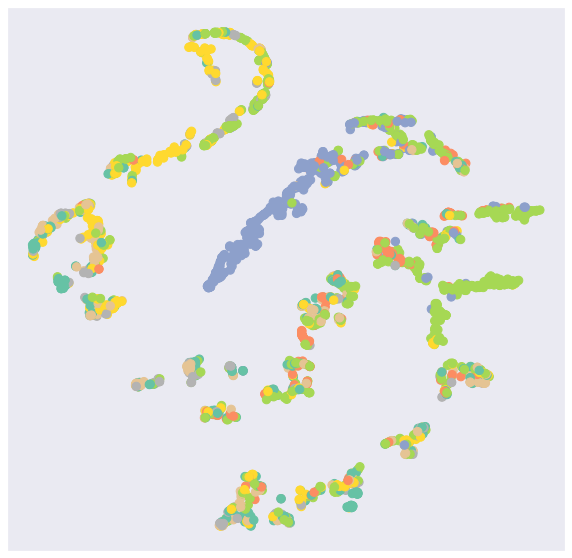

In [196]:
from functools import partial
import torch.nn.functional as F
from torch_scatter import scatter_add
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.nn.inits import glorot, zeros
from torch.nn import Parameter, Sequential, Linear, BatchNorm1d
from torch_geometric.utils import remove_self_loops, add_self_loops
from torch_geometric.nn import GCNConv, GINConv, GATConv, SAGEConv, SGConv, global_add_pool, global_mean_pool
class GraphSAGE(torch.nn.Module):
    def __init__(self, num_layers, hidden_channels, pool="sum", bn=False, xavier=True):
        super(GraphSAGE, self).__init__()
        self.convs = nn.ModuleList()
        self.acts = nn.ModuleList()
        a = nn.ReLU()
        self.convs.append(SAGEConv(data.num_features, hidden_channels, "max"))
        self.acts.append(a)
        for i in range(num_layers-1):
            self.convs.append(SAGEConv(hidden_channels, hidden_channels, "max"))
            self.acts.append(a)
        self.classifier = Linear(hidden_channels, dataset.num_classes)


    def forward(self, x, edge_index, num_layers):
        h=x
        for l in range(num_layers):
            h = self.convs[l](h, edge_index)
            h = self.acts[l](h)
        out = self.classifier(h)
        return out, h
    
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

def init_model(num_layers):
      model = GraphSAGE(num_layers, hidden_channels=16)
      optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
      criterion = torch.nn.CrossEntropyLoss()
      return model, optimizer, criterion

def train(model, optimizer, criterion, num_layers):
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out, h = model(data.x, data.edge_index, num_layers)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      accuracy = 0
      accuracy_val = 0
      return out, h, loss, accuracy, accuracy_val

def train_test(model, optimizer, criterion, num_layers):
      model.eval()
      out, h = model(data.x, data.edge_index, num_layers)
      predicted_classes = torch.argmax(out[data.train_mask], axis=1)
      target_classes = data.y[data.train_mask]
      #train_correct = pred[data.train_mask] == data.y[data.train_mask]  # Check against ground-truth labels.
      #print(out)
      train_acc = torch.mean(torch.where(predicted_classes == target_classes, 1, 0).float())
      predicted_classes = torch.argmax(out, axis=1)
      target_classes = data.y
      accuracy_val = torch.mean(torch.where(predicted_classes == target_classes, 1, 0).float())
      return train_acc, accuracy_val

def test(model, optimizer, criterion, num_layers):
      model.eval()
      out = model(data.x, data.edge_index, num_layers)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

def call_train(model, optimizer, criterion, num_layers):
    for epoch in range(1, train_epochs+1):
        out, h, loss, accuracy, accuracy_val = train(model, optimizer, criterion, num_layers)
        if epoch==0 or epoch%train_epochs==0:
            print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    accuracy, accuracy_val = train_test(model, optimizer, criterion, num_layers)
    return out, h, accuracy, accuracy_val


def modeler(num_layers):
      model, optimizer, criterion = init_model(num_layers)
      out_x, h, accuracy, accuracy_val = call_train(model, optimizer, criterion, num_layers)
      #test_acc = test(model, optimizer, criterion, num_layers)*100
      #test_accuracy_list.append(test_acc)
      #train_acc = train_test(model, optimizer, criterion, num_layers)*100
      train_accuracy_list.append(accuracy.item())
      val_accuracy_list.append(accuracy_val.item())
      #print(f'Test Accuracy: {test_acc:.4f}')
      print(f'Train Accuracy: {accuracy:.4f}')
      print(f'Val Accuracy: {accuracy_val:.4f}')
      return model, out_x, h
    
    
# WITH MAD
test_accuracy_list = []
train_accuracy_list = []
val_accuracy_list = []
avg_sim_list = []
xpoints = []
MAD_SCORES = []
def layer_modeler(m):
    print("######### LAYER = ", m, " #######")
    xpoints.append(m)
    model, out_x, h = modeler(m)
    print(model)
    return h

def arrival(m):
    sim_mat = []
    row_diff_mat = []
    diff_mat = []
    for i in range(2, m+1):
        h = layer_modeler(i)
        if i == m:
            visualize(h, color=data.y)
    return sim_mat, row_diff_mat, diff_mat
    
similarity_scores, row_differences, difference_scores = arrival(9)

[Text(0.5, 0, 'Layers'), Text(0, 0.5, 'Accuracy')]

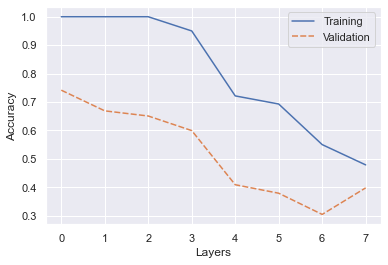

In [197]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({"Training": train_accuracy_list,
                 "Validation" : val_accuracy_list})
train_accuracy_coms.append(df)
p = sns.lineplot(data = df)
p.set( xlabel = "Layers", ylabel = "Accuracy")

SIMPLE GRAPH CONVOLUTION

<IPython.core.display.Javascript object>

######### LAYER =  2  #######
Epoch: 050, Loss: 1.0552
Train Accuracy: 0.9643
Val Accuracy: 0.7899
SGC(
  (conv): SGConv(1433, 16, K=2)
  (act): ReLU()
  (classifier): Linear(in_features=16, out_features=7, bias=True)
)
######### LAYER =  3  #######
Epoch: 050, Loss: 1.2839
Train Accuracy: 0.9071
Val Accuracy: 0.7718
SGC(
  (conv): SGConv(1433, 16, K=3)
  (act): ReLU()
  (classifier): Linear(in_features=16, out_features=7, bias=True)
)
######### LAYER =  4  #######
Epoch: 050, Loss: 1.1481
Train Accuracy: 0.9286
Val Accuracy: 0.8143
SGC(
  (conv): SGConv(1433, 16, K=4)
  (act): ReLU()
  (classifier): Linear(in_features=16, out_features=7, bias=True)
)
######### LAYER =  5  #######
Epoch: 050, Loss: 1.2481
Train Accuracy: 0.9143
Val Accuracy: 0.8250
SGC(
  (conv): SGConv(1433, 16, K=5)
  (act): ReLU()
  (classifier): Linear(in_features=16, out_features=7, bias=True)
)
######### LAYER =  6  #######
Epoch: 050, Loss: 1.2919
Train Accuracy: 0.9000
Val Accuracy: 0.7504
SGC(
  (conv): SGConv

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


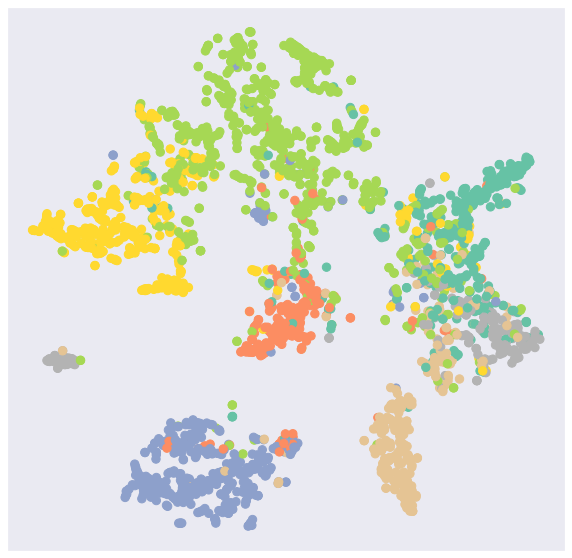

In [198]:
from functools import partial
import torch.nn.functional as F
from torch_scatter import scatter_add
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.nn.inits import glorot, zeros
from torch.nn import Parameter, Sequential, Linear, BatchNorm1d
from torch_geometric.utils import remove_self_loops, add_self_loops
from torch_geometric.nn import GCNConv, GINConv, GATConv, SAGEConv, SGConv, global_add_pool, global_mean_pool
class SGC(torch.nn.Module):
    def __init__(self, num_layers, hidden_channels):
        super(SGC, self).__init__()
        self.conv = SGConv(data.num_features, hidden_channels, num_layers)
        self.act = nn.ReLU()
        self.classifier = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, num_layers):
        h=x
        h = self.conv(h, edge_index)
        h = self.act(h)
        out = self.classifier(h)
        return out, h
    
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

def init_model(num_layers):
      model = SGC(num_layers, hidden_channels=16)
      optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
      criterion = torch.nn.CrossEntropyLoss()
      return model, optimizer, criterion

def train(model, optimizer, criterion, num_layers):
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out, h = model(data.x, data.edge_index, num_layers)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      accuracy = 0
      accuracy_val = 0
      return out, h, loss, accuracy, accuracy_val

def train_test(model, optimizer, criterion, num_layers):
      model.eval()
      out, h = model(data.x, data.edge_index, num_layers)
      predicted_classes = torch.argmax(out[data.train_mask], axis=1)
      target_classes = data.y[data.train_mask]
      #train_correct = pred[data.train_mask] == data.y[data.train_mask]  # Check against ground-truth labels.
      #print(out)
      train_acc = torch.mean(torch.where(predicted_classes == target_classes, 1, 0).float())
      predicted_classes = torch.argmax(out, axis=1)
      target_classes = data.y
      accuracy_val = torch.mean(torch.where(predicted_classes == target_classes, 1, 0).float())
      return train_acc, accuracy_val

def test(model, optimizer, criterion, num_layers):
      model.eval()
      out = model(data.x, data.edge_index, num_layers)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

def call_train(model, optimizer, criterion, num_layers):
    for epoch in range(1, train_epochs+1):
        out, h, loss, accuracy, accuracy_val = train(model, optimizer, criterion, num_layers)
        if epoch==0 or epoch%train_epochs==0:
            print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    accuracy, accuracy_val = train_test(model, optimizer, criterion, num_layers)
    return out, h, accuracy, accuracy_val


def modeler(num_layers):
      model, optimizer, criterion = init_model(num_layers)
      out_x, h, accuracy, accuracy_val = call_train(model, optimizer, criterion, num_layers)
      #test_acc = test(model, optimizer, criterion, num_layers)*100
      #test_accuracy_list.append(test_acc)
      #train_acc = train_test(model, optimizer, criterion, num_layers)*100
      train_accuracy_list.append(accuracy.item())
      val_accuracy_list.append(accuracy_val.item())
      #print(f'Test Accuracy: {test_acc:.4f}')
      print(f'Train Accuracy: {accuracy:.4f}')
      print(f'Val Accuracy: {accuracy_val:.4f}')
      return model, out_x, h
    
    
# WITH MAD
test_accuracy_list = []
train_accuracy_list = []
val_accuracy_list = []
avg_sim_list = []
xpoints = []
MAD_SCORES = []
def layer_modeler(m):
    print("######### LAYER = ", m, " #######")
    xpoints.append(m)
    model, out_x, h = modeler(m)
    print(model)
    return h

def arrival(m):
    sim_mat = []
    row_diff_mat = []
    diff_mat = []
    for i in range(2, m+1):
        h = layer_modeler(i)
        if i == m:
            visualize(h, color=data.y)
    return sim_mat, row_diff_mat, diff_mat
    
similarity_scores, row_differences, difference_scores = arrival(9)

[Text(0.5, 0, 'Layers'), Text(0, 0.5, 'Accuracy')]

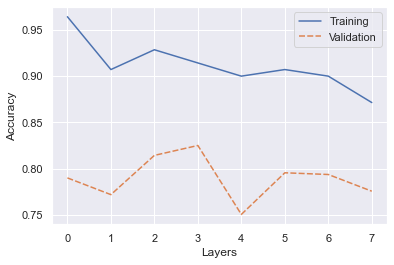

In [199]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({"Training": train_accuracy_list,
                 "Validation" : val_accuracy_list})
train_accuracy_coms.append(df)
p = sns.lineplot(data = df)
p.set( xlabel = "Layers", ylabel = "Accuracy")